<a href="https://colab.research.google.com/github/MelinaKlostermann/MLX-course/blob/main/OxML2024_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OxML 2024**: Part II of the practical session (DNN: Deep Neural Networks)



## MNIST (Application of backprop by Yann LeCun, 1989)

In [13]:
# @title Setup
import numpy as np
import pandas as pd
from torchvision import datasets
import matplotlib.pyplot as plt
train_dataset = datasets.MNIST(root='./data', train=True, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, download=True)

X_train = train_dataset.data.numpy()
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()

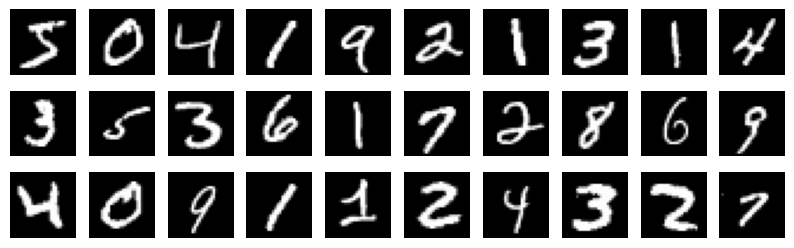

In [14]:
# Normalize
X_train = X_train / 255
X_test = X_test / 255

plt.figure(figsize=(10, 3))
for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### Set the training and test dataset

In [16]:
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                               torch.tensor(y_train, dtype=torch.int64))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                                              torch.tensor(y_test, dtype=torch.int64))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256)

### Define a Deep Neural Network

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Define a Loss fucntion and optimizaer

In [18]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.02)

### Train the network

In [19]:
epochs = 20

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.view(-1, 28*28)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_epoch_loss = running_loss / len(train_loader)
    print(f'Epoch {epoch} loss {avg_epoch_loss:.04f}')

Epoch 0 loss 2.1581
Epoch 1 loss 1.3665
Epoch 2 loss 0.6830
Epoch 3 loss 0.5024
Epoch 4 loss 0.4331
Epoch 5 loss 0.3947
Epoch 6 loss 0.3687
Epoch 7 loss 0.3495
Epoch 8 loss 0.3337
Epoch 9 loss 0.3210
Epoch 10 loss 0.3095
Epoch 11 loss 0.2994
Epoch 12 loss 0.2902
Epoch 13 loss 0.2818
Epoch 14 loss 0.2739
Epoch 15 loss 0.2667
Epoch 16 loss 0.2597
Epoch 17 loss 0.2530
Epoch 18 loss 0.2465
Epoch 19 loss 0.2401


Evaluate the model we trained

In [20]:
model.eval()

P = []
with torch.no_grad():
    for tag, loader in [('train', train_loader),
                        ('test', test_loader)]:
        correct, total = 0, 0
        for images, labels in loader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            if tag == 'test':
                P.append(predicted)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        hit_rate = correct / total
        print(f'Hit rate {tag} - {hit_rate:.02%}')

Hit rate train - 93.33%
Hit rate test - 93.45%


Let's explore some predictions.

In [21]:
pred = np.concatenate(P)

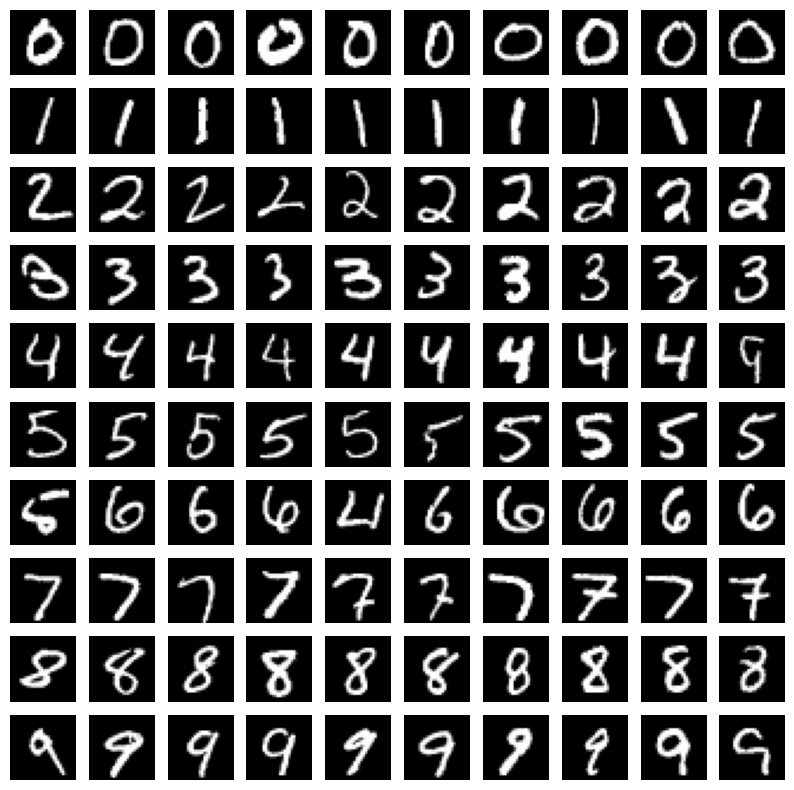

In [22]:
plt.figure(figsize=(10, 10))
for label in range(10):
    for i in range(10):
        plt.subplot(10, 10, label * 10 + i + 1)
        plt.imshow(X_test[pred == label][i], cmap='gray')
        plt.axis('off')
plt.show()

Let's look only at misclassifiesd cases.

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

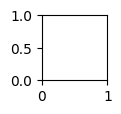

In [23]:
plt.figure(figsize=(10, 10))
for label in range(10):
    for i in range(10):
        plt.subplot(10, 10, label * 10 + i + 1)
        mask = (pred == i) & (y_test.numpy() == label)
        if mask.sum() > 0:
            plt.imshow(X_test[mask][0], cmap='gray')
        plt.axis('off')
plt.show()

As you might know the traditional ML approch lick (Random Forest) can achieved similar accuracy so why do we need NN then?

### **Task:**

Well, let's try to increse number of parameters in our network.




```
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
```
Try increasing the parameters in fc1,2,3 or you can add another layer.


In [24]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 64) # Change here
        self.fc2 = nn.Linear(64, 32) # Change here
        self.fc3 = nn.Linear(32, 10) # Change here

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [25]:
# @title Solution
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 1500)
        self.fc2 = nn.Linear(1500, 1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [26]:
# @title Test your Network
epochs = 20
device = 'cuda'  # Make sure to replace 'mps' with 'cuda' if using NVIDIA GPUs or 'cpu' if you don't have access to GPU.

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.02)

for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for images, labels in train_loader:
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_epoch_loss = running_loss / len(train_loader)
    training_accuracy = correct_predictions / total_predictions * 100
    print(f'Epoch {epoch}, Loss: {avg_epoch_loss:.04f}, Training Accuracy: {training_accuracy:.02f}%')

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            val_total_predictions += labels.size(0)
            val_correct_predictions += (predicted == labels).sum().item()

    avg_val_loss = val_running_loss / len(test_loader)
    validation_accuracy = val_correct_predictions / val_total_predictions * 100
    print(f'Validation Loss: {avg_val_loss:.04f}, Validation Accuracy: {validation_accuracy:.02f}%\n')

Epoch 0, Loss: 2.2509, Training Accuracy: 49.84%
Validation Loss: 2.1431, Validation Accuracy: 59.89%

Epoch 1, Loss: 1.6385, Training Accuracy: 66.17%
Validation Loss: 0.9736, Validation Accuracy: 75.85%

Epoch 2, Loss: 0.7213, Training Accuracy: 80.73%
Validation Loss: 0.5389, Validation Accuracy: 84.90%

Epoch 3, Loss: 0.4886, Training Accuracy: 86.24%
Validation Loss: 0.4184, Validation Accuracy: 87.77%

Epoch 4, Loss: 0.4046, Training Accuracy: 88.59%
Validation Loss: 0.3628, Validation Accuracy: 89.30%

Epoch 5, Loss: 0.3605, Training Accuracy: 89.79%
Validation Loss: 0.3422, Validation Accuracy: 90.09%

Epoch 6, Loss: 0.3310, Training Accuracy: 90.64%
Validation Loss: 0.3060, Validation Accuracy: 91.06%

Epoch 7, Loss: 0.3091, Training Accuracy: 91.22%
Validation Loss: 0.2865, Validation Accuracy: 91.75%

Epoch 8, Loss: 0.2899, Training Accuracy: 91.76%
Validation Loss: 0.2703, Validation Accuracy: 92.07%

Epoch 9, Loss: 0.2738, Training Accuracy: 92.18%
Validation Loss: 0.2570,

Thats better! For examply by using layers 1500, 1000, 500, 10 you can improve accuracy to ~98.24%, but training will take quite some time. Actually you can go even futher with simple data augmentation techniques - https://arxiv.org/pdf/1003.0358.pdf

To the save and load the model you can use:

In [27]:
torch.save(model, 'mnist-model.pth')
# model = torch.load('mnist-model.pth')


## CIFAR10 dataset, Train a Classifier

The CIFAR10 dataset, which has the classes:
'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
'ship', 'truck'. The images in CIFAR-10 are of size 3x32x32, i.e.
3-channel color images of 32x32 pixels in size.

![cifar10](https://pytorch.org/tutorials/_static/img/cifar10.png)

Training an image classifier
----------------------------

We will do the following steps in order:

1.  Load and normalize the CIFAR10 training and test datasets using
    `torchvision`
2.  Define a Convolutional Neural Network
3.  Define a loss function
4.  Train the network on the training data
5.  Test the network on the test data

### 1. Load and normalize CIFAR10

Using `torchvision`, it's extremely easy to load CIFAR10.

In [28]:
import torch
import torchvision
import torchvision.transforms as transforms
import time

The output of torchvision datasets are PILImage images of range \[0,
1\]. We transform them to Tensors of normalized range \[-1, 1\].

In [29]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:04<00:00, 42576772.08it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


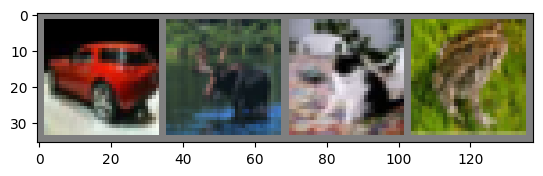

car   deer  cat   frog 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Define a Convolutional Neural Network



In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### Define a Loss function and optimizer

Here we use lib `optim` from `torch`, which contains many different optimization algorithms, including `SGD`, as well as `Mini-SGD`, `adam` and so on.


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# The core idea of the momentum optimization algorithm is to consider not only the current gradient but also the previous gradient direction every time the parameters are updated, thereby making the optimization process smoother and more stable.

### Train the network


This is when things start to get interesting. We simply have to loop
over our data iterator, and feed the inputs to the network and optimize.

In [ ]:
start_time = time.time()

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
end_time = time.time()
training_time = end_time - start_time

print('Finished Training')
print(f'Training time: {training_time:.2f} seconds in CPU')

[1,  2000] loss: 2.187
[1,  4000] loss: 1.892
[1,  6000] loss: 1.669
[1,  8000] loss: 1.576
[1, 10000] loss: 1.507
[1, 12000] loss: 1.445
[2,  2000] loss: 1.381
[2,  4000] loss: 1.328
[2,  6000] loss: 1.325
[2,  8000] loss: 1.297
[2, 10000] loss: 1.272
[2, 12000] loss: 1.284
Finished Training


Let's quickly save our trained model:

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Test the network on the test data


We have trained the network for 2 passes over the training dataset. But
we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get
familiar.

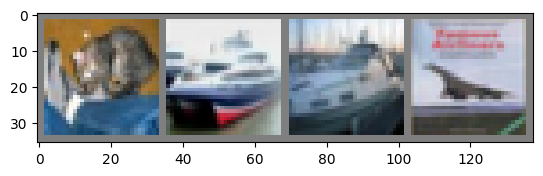

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Next, let\'s load back in our saved model (note: saving and re-loading
the model wasn\'t necessary here, we only did it to illustrate how to do
so):


In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Okay, now let us see what the neural network thinks these examples above
are:

In [ ]:
outputs = net(images)

The outputs are energies for the 10 classes. The higher the energy for a
class, the more the network thinks that the image is of the particular
class. So, let\'s get the index of the highest energy:


In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   plane ship  plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


That looks way better than chance, which is 10% accuracy (randomly
picking a class out of 10 classes). Seems like the network learnt
something.

Questions! We really want to know what are the classes that performed well, and the classes that did not perform well:


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 64.7 %
Accuracy for class: car   is 69.4 %
Accuracy for class: bird  is 30.6 %
Accuracy for class: cat   is 33.4 %
Accuracy for class: deer  is 75.5 %
Accuracy for class: dog   is 43.9 %
Accuracy for class: frog  is 49.1 %
Accuracy for class: horse is 49.9 %
Accuracy for class: ship  is 71.3 %
Accuracy for class: truck is 45.0 %


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [ ]:
net.to(device)

In [ ]:
start_time = time.time()

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]/ to device
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
end_time = time.time()
training_time = end_time - start_time

print('Finished Training')
print(f'Training time: {training_time:.2f} seconds in GPU')

[1,  2000] loss: 1.251
[1,  4000] loss: 1.226
[1,  6000] loss: 1.249
[1,  8000] loss: 1.265
[1, 10000] loss: 1.233
[1, 12000] loss: 1.223
[2,  2000] loss: 1.228
[2,  4000] loss: 1.246
[2,  6000] loss: 1.243
[2,  8000] loss: 1.242
[2, 10000] loss: 1.226
[2, 12000] loss: 1.250
Finished Training
Training time: 82.01 seconds in GPU


Why don't I notice MASSIVE speedup compared to CPU?

### **Task:**

Try increasing the width of your network (argument 2 of
the first `nn.Conv2d`, and argument 1 of the second `nn.Conv2d` -- they
need to be the same number), see what kind of speedup you get.

In [ ]:
class YourNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 12, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = YourNet()
net.to(device)

YourNet(
  (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
start_time = time.time()

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]/ to device
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
end_time = time.time()
training_time = end_time - start_time

print('Finished Training')
print(f'Training time: {training_time:.2f} seconds in GPU')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[1,  2000] loss: 2.304
[1,  4000] loss: 2.303
[1,  6000] loss: 2.303
[1,  8000] loss: 2.305
[1, 10000] loss: 2.305
[1, 12000] loss: 2.304
[2,  2000] loss: 2.304
[2,  4000] loss: 2.303
[2,  6000] loss: 2.304
[2,  8000] loss: 2.304
[2, 10000] loss: 2.305
[2, 12000] loss: 2.303
Finished Training
Training time: 75.53 seconds in GPU


## Resources (further reading)
- Rosenblatt’s perceptron, the first modern neural network ([blog post](https://towardsdatascience.com/rosenblatts-perceptron-the-very-first-neural-network-37a3ec09038a))
- Neural Network in 11 lines of code ([blog post](https://iamtrask.github.io/2015/07/12/basic-python-network/))
- Favio Vázquez [posts](https://medium.com/@faviovazquez)
- Neural Networks with good MNIST [demo](https://ml4a.github.io/ml4a/neural_networks/)
- Legendary Andrew Ng [course](https://www.coursera.org/learn/machine-learning)
- Veritasium [video](https://www.youtube.com/watch?v=GVsUOuSjvcg)
- Neural Networks and Deep Learning: [A Textbook](https://www.amazon.com/Neural-Networks-Deep-Learning-Textbook/dp/3319944622)